## Сборный проект: интернет-магазина «Стримчик»

### Описание проекта:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).\
Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы:
- Шаг 1 - Открытие файла
- Шаг 2 - Предобработка данных
- Шаг 3 - Исследовательский анализ данных
- Шаг 4 - Составление портрета пользователей
- Шаг 5 - Проверка гипотез
- Шаг 6 - Общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию

#### Блок установки библиотек

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

#### Блок импорта библиотек

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#### Блок создания датафорейма

In [3]:
games = pd.read_csv('/datasets/games.csv')

#### Обзор данных

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
games.duplicated().sum()

0

In [9]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Как видно из предворительного просмотра данных, последующая предобработка будет включать следующие шаги:
- Заполнение пропусков;
- Предобразование данных в столбце Nsme в snace_case
- Преобразование Year_of_Release, Critic_Score, User_Score в неоюходимый формат
- Проверка столбов Platform и Genre на неявные дубликаты

### Шаг 2 - Предобработка данных

#### Столбец "Name"

Перевод в lowercase

In [10]:
games['Name'] = games['Name'].str.lower()
games['Name'].head()

0                  wii sports
1           super mario bros.
2              mario kart wii
3           wii sports resort
4    pokemon red/pokemon blue
Name: Name, dtype: object

In [11]:
len(games['Name'].unique())

11560

Проверим на наличие неявных дублей

In [12]:
duplicate_values = games[games.duplicated(subset=['Name'], keep=False)]
display(duplicate_values.sort_values('Name'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3862,frozen: olaf's quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3120,007: quantum of solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
1785,007: quantum of solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
1285,007: quantum of solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
...,...,...,...,...,...,...,...,...,...,...,...
12439,zumba fitness core,Wii,2012.0,Misc,0.00,0.06,0.00,0.01,NaN,tbd,E10+
7137,zumba fitness: world party,Wii,2013.0,Misc,0.11,0.10,0.00,0.02,NaN,tbd,E
6878,zumba fitness: world party,XOne,2013.0,Misc,0.17,0.05,0.00,0.02,73.0,6.2,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


In [13]:
games.iloc[[3862, 3358]]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3862,frozen: olaf's quest,DS,2013.0,Platform,0.21,0.26,0.0,0.04,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013.0,Platform,0.27,0.27,0.0,0.05,NaN,NaN,NaN


Как мы видим - большая часть выявленных дубликатов приходится на выпуски игры на разных платформах, следовательно нам необходимо сделать поиск дубликатов по двум столбцам

#### Столбец "Platform"

In [14]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Как мы видим, в дополнительной обработке нет необходимости, и значит  мы можем использовать его для поиска неявных дубликатов 

In [15]:
duplicate_rows = games[games.duplicated(subset=['Name', 'Platform'])]
duplicate_rows.sort_values('Name')

                              Name Platform  Year_of_Release     Genre  \
16230                madden nfl 13      PS3           2012.0    Sports   
1591   need for speed: most wanted     X360           2005.0    Racing   
11715  need for speed: most wanted       PC           2012.0    Racing   
4127            sonic the hedgehog      PS3              NaN  Platform   
14244                          NaN      GEN           1993.0       NaN   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16230       0.0      0.01      0.00         0.00          83.0        5.5   
1591        1.0      0.13      0.02         0.10          83.0        8.5   
11715       0.0      0.06      0.00         0.02          82.0        8.5   
4127        0.0      0.48      0.00         0.00          43.0        4.1   
14244       0.0      0.00      0.03         0.00           NaN        NaN   

      Rating  
16230      E  
1591       T  
11715      T  
4127    E10+  
14244    NaN  


Как мы видим, существует пять потенциальных дубликатов

In [16]:
games[games['Name'] == 'madden nfl 13'].sort_values(['Name', 'Platform'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E
5887,madden nfl 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
3986,madden nfl 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
7066,madden nfl 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
507,madden nfl 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E


In [17]:
games[games['Name'] == 'need for speed: most wanted'].sort_values(['Name', 'Platform'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,need for speed: most wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T


In [18]:
games[games['Name'] == 'sonic the hedgehog'].sort_values(['Name', 'Platform'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
257,sonic the hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,sonic the hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
1996,sonic the hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


In [19]:
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таким образом мы видим, что во в большинстве случаем мы получаем строку с нулевыми/аналогичными значениями.\
Учитывая их количество, мы можем удалить данные строки без потерь для качества анализа

In [20]:
games = games.dropna(subset = ['Name'])
games = games.drop_duplicates(subset=['Name', 'Platform'], keep='first')
duplicate_rows = games[games.duplicated(subset=['Name', 'Platform'])]
duplicate_rows

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


#### Столбец "Year_of_Realease"

In [21]:
games[games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразуем нули на основе выхода той же игры на других платформах, удалив оставшиеся нули.

In [22]:
for index, row in games[games['Year_of_Release'].isna()].iterrows():
    matching_row = games[(games['Name'] == row['Name']) & (~games['Year_of_Release'].isna())]
    if not matching_row.empty:
        games.at[index, 'Year_of_Release'] = matching_row['Year_of_Release'].values[0]
    else:
        games.drop(index, inplace=True)

In [23]:
games[games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Проверим на неверные года

In [24]:
w1 = games[~games['Year_of_Release'].astype(str).str.contains(r'^\d{4}$')]

w1

                                Name Platform  Year_of_Release         Genre  \
0                         wii sports      Wii           2006.0        Sports   
1                  super mario bros.      NES           1985.0      Platform   
2                     mario kart wii      Wii           2008.0        Racing   
3                  wii sports resort      Wii           2009.0        Sports   
4           pokemon red/pokemon blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  samurai warriors: sanada maru      PS3           2016.0        Action   
16711               lma manager 2007     X360           2006.0        Sports   
16712        haitaka no psychedelica      PSV           2016.0     Adventure   
16713               spirits & spells      GBA           2003.0      Platform   
16714            winning post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Ot

Как мы видели выше - год выхода это год, таким образом мы можем перевести его в int64

In [25]:
games['Year_of_Release'] = games['Year_of_Release'].astype('int')

#### Столбец Genre

In [26]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Как мы видим, доб обработка избыточна.

#### Столбцы "... Sales"

In [27]:
games[['NA_sales','EU_sales','JP_sales', 'Other_sales']].isna().sum()

NA_sales       0
EU_sales       0
JP_sales       0
Other_sales    0
dtype: int64

Как мы видим, данные столбцы не содержат пропусков и, исходя из инфо, уже являются типом "float".\
Таким образом единственное, что мы можем сделать для удобства работы с информацией - соединить данные значения в единый столбец с общей суммой.

In [28]:
games['Total_sales'] =  games[['NA_sales','EU_sales','JP_sales', 'Other_sales']].sum(axis = 1)
games[games['Total_sales'] == 0.0 ]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
16676,g1 jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,score international baja 1000: the official game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


Как мы видим - строк с нулевым значением в сумме две, значит мы можем удалить их без потерь для точности анализа

In [29]:
games = games[games['Total_sales'] != 0.0]

#### Столбец "Critic_score"

In [30]:
games['Critic_Score'].isna().sum()

8490

Учитывая количество пропусков и невозможность восстановить изначальные значения, мы заменим NaN значения на -1 - таким образом их будет легко определить и это позволит привести столбец к типу "float64"

In [31]:
games['Critic_Score'] = games['Critic_Score'].fillna('-1')
games['Critic_Score'] = games['Critic_Score'].astype('float') 
games['Critic_Score'].value_counts()

-1.0     8490
 70.0     253
 71.0     252
 75.0     243
 78.0     238
         ... 
 20.0       3
 29.0       3
 13.0       1
 17.0       1
 21.0       1
Name: Critic_Score, Length: 82, dtype: int64

#### Столбец "User_Score"

In [32]:
games['User_Score'].isna().sum()

6631

Аналогично критикам, но стоит обратить внимкание на "tbd" - To Be Determined, другими словами для преобразования во float необходимо их тоже заменить на -1

In [33]:
games.loc[games['User_Score'] == 'tbd', 'User_Score'] = '-1'
games['User_Score'] = games['User_Score'].fillna('-1')
games['User_Score'] = games['User_Score'].astype('float') 
games['User_Score'].value_counts()

-1.0    9025
 7.8     324
 8.0     288
 8.2     279
 8.3     253
        ... 
 0.7       2
 0.2       2
 1.0       2
 9.7       1
 0.0       1
Name: User_Score, Length: 96, dtype: int64

#### Столбец "Rating"

Относительно рейтингов:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A - старый вариант маркировки E (for everyone)

In [34]:
games['Rating'].isna().sum()

6697

In [35]:
games['Rating'].value_counts()

E       3957
T       2928
M       1554
E10+    1411
EC         8
K-A        3
RP         2
AO         1
Name: Rating, dtype: int64

1) Учитывая, что тип значений столбца - string, заполним пустоты "unknown"
2) Исходя из рейтингов выше, можно заменить 'RP' на 'Unknown', 'K-A' на 'E' и 'AO' на 'M'

In [36]:
games['Rating'] = games['Rating'].fillna('Unknown')
games.loc[games['Rating'] == 'RP', 'Rating'] = 'Unknown'
games.loc[games['Rating'].isin(['K-A']), 'Rating'] = 'E'
games.loc[games['Rating'] == 'AO', 'Rating'] = 'M'

games['Rating'].value_counts()

Unknown    6699
E          3960
T          2928
M          1555
E10+       1411
EC            8
Name: Rating, dtype: int64

Вывод: в течении предобработки мы заполнили все пустые значения, преобразовали строки в необходимый тип данных, перевели значения в змеиный язык и добавили столбец с общей прибылью. 

<div class="alert alert-info"> Правки <div>

Возникновение пропусков может быть связано с следующим:
- Некорректная выгрузка из БД
- Рукописный ввод значений редакторами, в то время как основной массив находится в другой таблице
- Некорректный сбор информации из разных источников, затирающий\упускающий некоторые из данных
- Невнимательность пользователей при работе с таблицей (случайное удаление данных очень часая ошибка)
- Правила безопасности игровых кампаний, запрещающие публикацию тех или иных данных

### Шаг 3 - Исследовательский анализ данных

#### 3.1 Выпуск игр.
Посмотрите, сколько игр выпускалось в разные годы.\
Важны ли данные за все периоды?

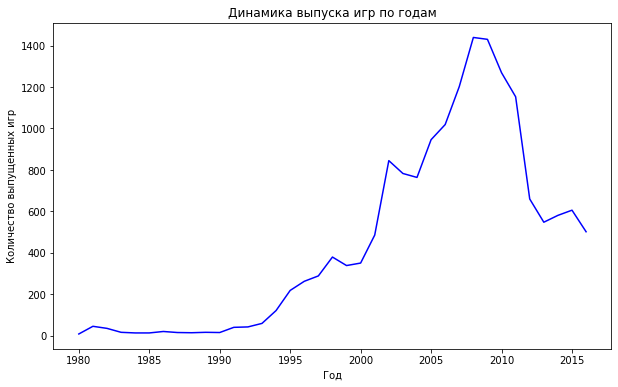

2008    1439
2009    1430
2010    1269
2007    1202
2011    1153
Name: Year_of_Release, dtype: int64

In [37]:
games_by_year = games.pivot_table(index='Year_of_Release', values='Total_sales', aggfunc='count')
plt.figure(figsize=(10, 6))
(sns.lineplot(data = games_by_year, x = games_by_year.index, y = 'Total_sales', color = 'blue')
    .set(title = 'Динамика выпуска игр по годам', xlabel = 'Год', ylabel = 'Количество выпущенных игр'))
plt.show()

games['Year_of_Release'].value_counts().head()

*Вывод*: 
- На графике видно, что развитие игр с 1980 года по 2000 было слабым.
- В 2000 году мы видим активный рост производства игр, продолжающийся до 2009 года.
- На 2008 и 2009 год приходится пик графика - в эти года производили больше всего игр (свыше 1400).
- Начиная с 2010 года количество выпускаемых игр значительно снизилось и остановилось на отметке около 500.\
Так же стоит отметить важность данные за все периоды, поскольку они позволяют проследить динамику разработки игр. 

#### 3.2 Продажи по платформам
Посмотрите, как менялись продажи по платформам.\
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.\
 За какой характерный срок появляются новые и исчезают старые платформы?

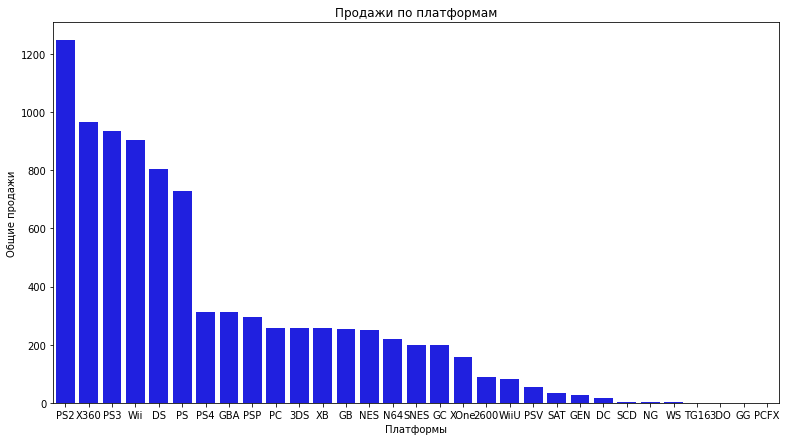

In [38]:
platform_sales = (games.pivot_table(index='Platform', values='Total_sales', aggfunc='sum')
    .sort_values('Total_sales', ascending=False)
)
plt.figure(figsize=(13, 7))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'Total_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

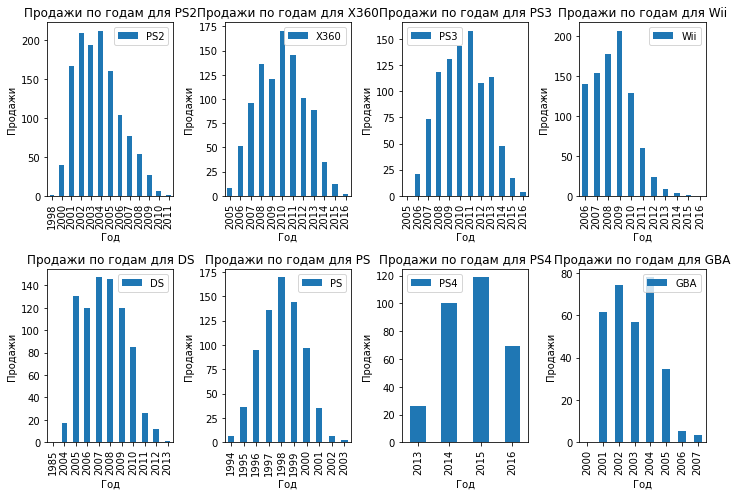

In [39]:
fig, axs = plt.subplots(2, 4, figsize=(10, 7))

for i, platform in enumerate(platform_sales.index[:8]):
    ax = axs[i//4, i%4]
    platform_data = games.query('Platform == @platform').pivot_table(index='Year_of_Release', values='Total_sales', aggfunc='sum')
    platform_data.plot(kind='bar', title='Продажи по годам для ' + platform, ax=ax)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи')
    ax.legend([platform])

plt.tight_layout()
plt.show()

Наибольшее количество продаж было у игр для PS2.\
Это легко объясняется тем, что японские производители далеко шагнули вперед в плане развития игровых консолей.\
Из-за отсуттствия аналогов по качеству\количеству игр, люди охотно покупали  PS2, а вместе с ней и игры. 

В топ 6 конкурентов среди продаж вошли:
- PlayStation 2 (успешен в 2002-2004 годах)
- Xbox360 (успешен в 2010-2011 годах)
- PlayStation 3 (успешен в 2008-2011 годах)
- Wii Nintendo (успешен в 2006-2009 годах)
- Nintendo DS (успешен в 2007-2008 годах)
- PlayStation (успешен в 1998-1999 годах)

Остальные консоли не могут похвастаться подобными продажами, что видно по топ 7 и 8(PS4 & GBA). 

Таким образом мы видим, что новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются.

#### 3.3 Актуальное на 2017
Возьмите данные за соответствующий актуальный период.\
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.\
Основной фактор — эти данные помогут построить прогноз на 2017 год.

В рамках данного анализа будем считать 2014-2016 гг актуальными и работать исходя их этого

In [40]:
actual_games = games.query('Year_of_Release >= 2014').copy()
actual_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.68
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01


#### 3.4 Рост и падение в актуальных годах
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

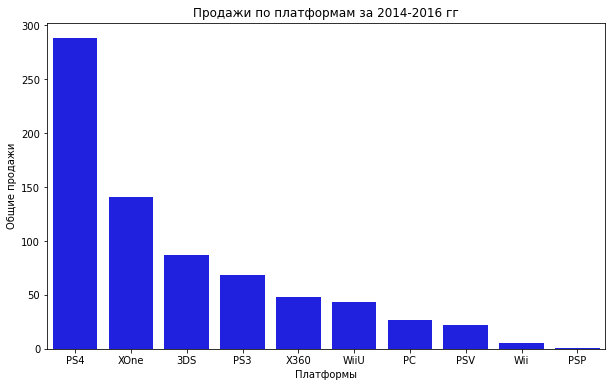

In [41]:
actual_platform_sales = (
    actual_games
    .pivot_table(index='Platform', values='Total_sales', aggfunc='sum')
    .sort_values('Total_sales', ascending=False)
)
plt.figure(figsize=(10, 6))
(sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'Total_sales', color = 'blue')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

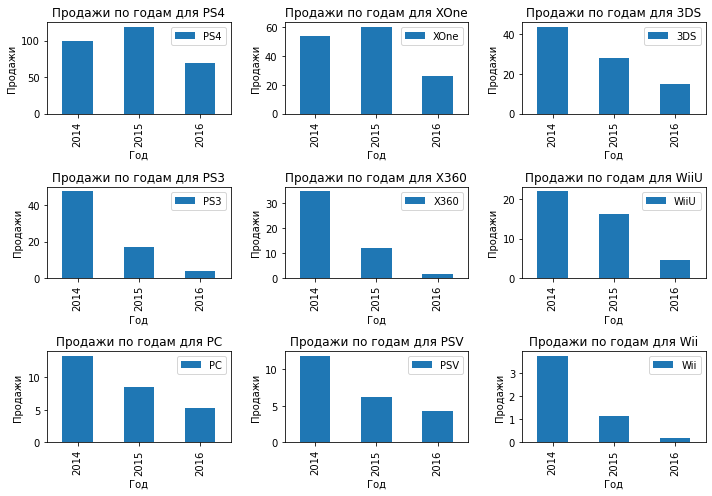

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(10, 7))

for i, platform in enumerate(actual_platform_sales.index[:9]):
    ax = axs[i//3, i%3]
    platform_data = actual_games.query('Platform == @platform').pivot_table(index='Year_of_Release', values='Total_sales', aggfunc='sum')
    platform_data.plot(kind='bar', title='Продажи по годам для ' + platform, ax=ax)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи')
    ax.legend([platform])

plt.tight_layout()
plt.show()

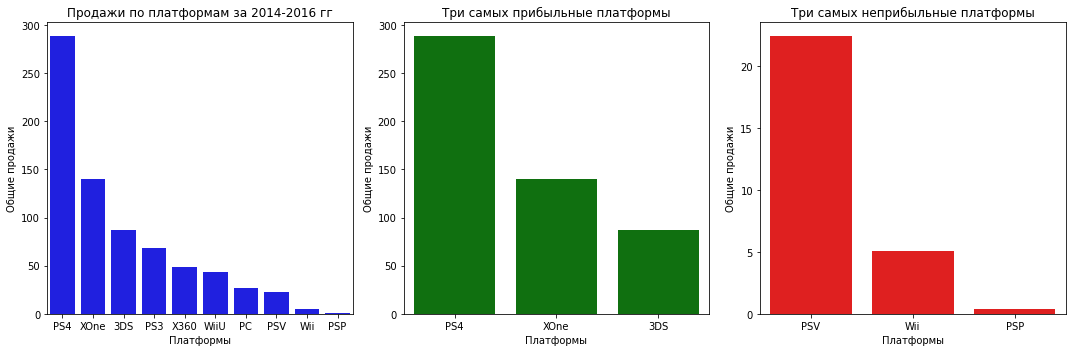

In [43]:
top3_profitable_platforms = actual_platform_sales.head(3)
bottom3_unprofitable_platforms = actual_platform_sales.tail(3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=actual_platform_sales, x=actual_platform_sales.index, y='Total_sales', color='blue')
plt.title('Продажи по платформам за 2014-2016 гг')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

plt.subplot(1, 3, 2)
sns.barplot(data=top3_profitable_platforms, x=top3_profitable_platforms.index, y='Total_sales', color='green')
plt.title('Три самых прибыльные платформы')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

plt.subplot(1, 3, 3)
sns.barplot(data=bottom3_unprofitable_platforms, x=bottom3_unprofitable_platforms.index, y='Total_sales', color='red')
plt.title('Три самых неприбыльные платформы')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

plt.tight_layout()
plt.show()

**Вывод**: На данном графике видно, что платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время.\
Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное второе место по продажам игр за 2014-2016 год занимает XboxOne.

#### 3.5 Ящик с усами
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


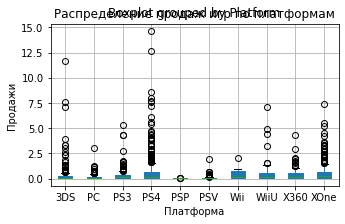

In [44]:
box = actual_games.boxplot(column='Total_sales', by='Platform', figsize=(5, 3), patch_artist=True)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Распределение продаж игр по платформам')
plt.show()

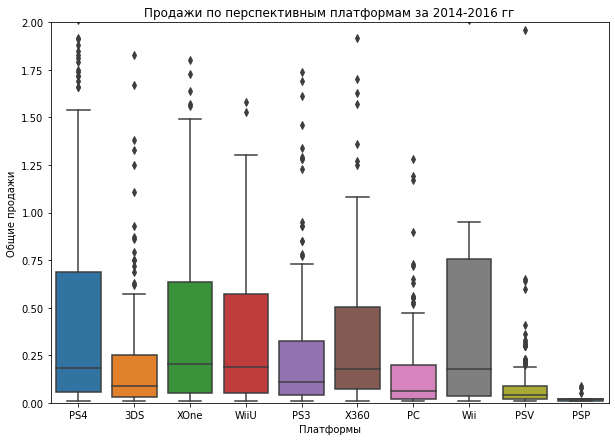

In [45]:
plt.figure(figsize=(10, 7))
(sns.boxplot(data = actual_games, y = 'Total_sales', x='Platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)))
plt.show()

**Вывод**: На данном графике видно, что распределение продаж среди платформ примерно одинаковое и медиана продаж находится на примерно одном уровне (0,1 - 0,2 миллиона проданных копий). \
Также можно отметить значения у наиболее продаваемых платформ, выходящие за пределы 3 квартиля, доходящие почти до 15 млн проданных копий. \
Данные значения не являются выбросами, так как демонстрируют нам наиболее продаваемые игры.

#### 3.6 Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.\
 Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.\
  Сформулируйте выводы.

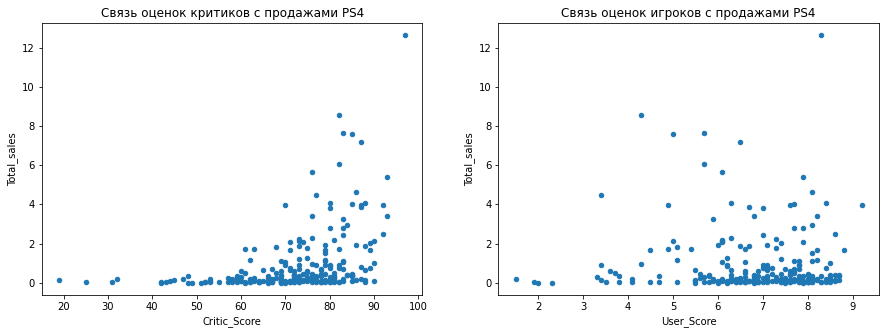

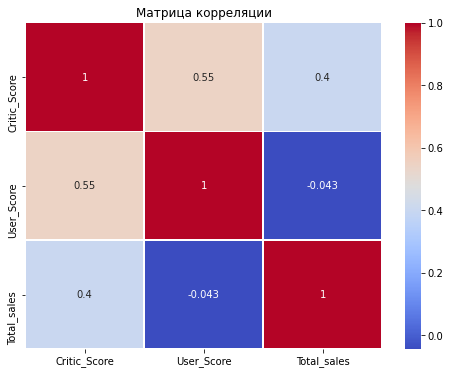

In [46]:
games_on_platform = actual_games.query('Platform == "PS4" & Critic_Score != -1 & User_Score != -1')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

games_on_platform[games_on_platform['Critic_Score'] != '-1'].plot(
    kind='scatter', 
    x='Critic_Score', 
    y='Total_sales', 
    ax=ax1
)
ax1.set_title('Связь оценок критиков с продажами PS4')

games_on_platform[games_on_platform['User_Score'] != '-1'].plot(
    kind='scatter', 
    x='User_Score',
    y='Total_sales', 
    ax=ax2
)
ax2.set_title('Связь оценок игроков с продажами PS4')

plt.show()

correlation_matrix = games_on_platform[(games_on_platform['Critic_Score'] != '-1') & (games_on_platform['User_Score'] != '-1')][['Critic_Score', 'User_Score', 'Total_sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Матрица корреляции')
plt.show()

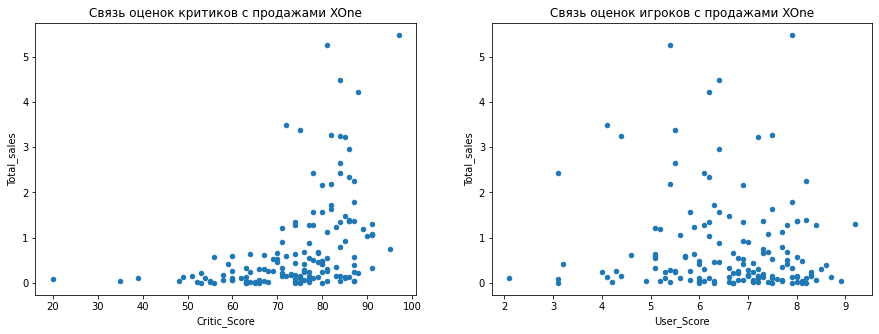

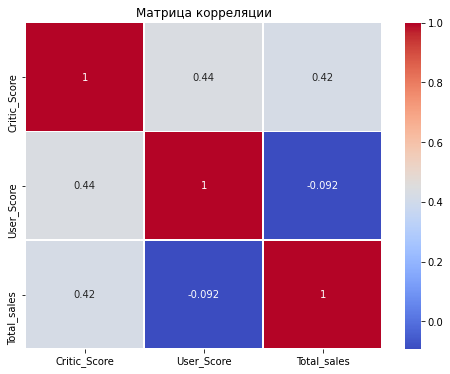

In [47]:
games_on_platform = actual_games.query('Platform == "XOne" & Critic_Score != -1 & User_Score != -1')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

games_on_platform[games_on_platform['Critic_Score'] != '-1'].plot(
    kind='scatter', 
    x='Critic_Score', 
    y='Total_sales', 
    ax=ax1
)
ax1.set_title('Связь оценок критиков с продажами XOne')

games_on_platform[games_on_platform['User_Score'] != '-1'].plot(
    kind='scatter', 
    x='User_Score',
    y='Total_sales', 
    ax=ax2
)
ax2.set_title('Связь оценок игроков с продажами XOne')

plt.show()

correlation_matrix = games_on_platform[(games_on_platform['Critic_Score'] != '-1') & (games_on_platform['User_Score'] != '-1')][['Critic_Score', 'User_Score', 'Total_sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Матрица корреляции')
plt.show()

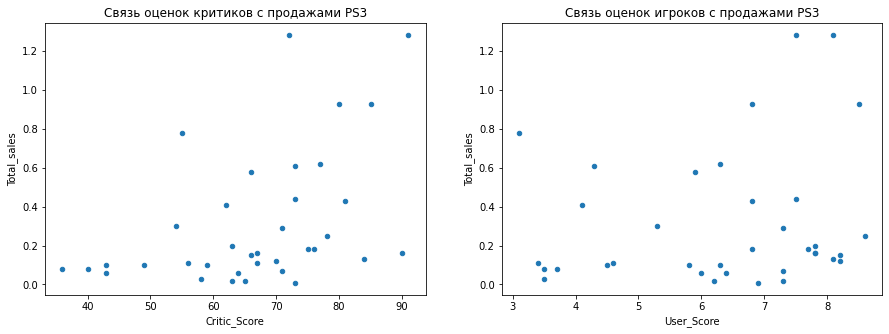

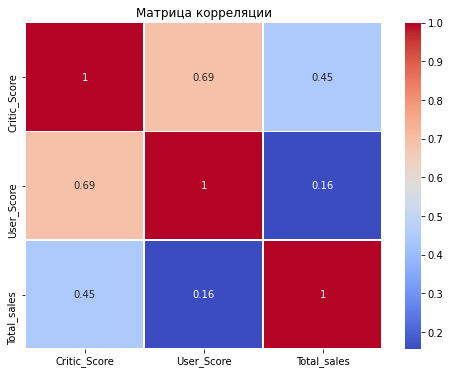

In [61]:
games_on_platform = actual_games.query('Platform == "PS3" & Critic_Score != -1 & User_Score != -1')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

games_on_platform[games_on_platform['Critic_Score'] != '-1'].plot(
    kind='scatter', 
    x='Critic_Score', 
    y='Total_sales', 
    ax=ax1
)
ax1.set_title('Связь оценок критиков с продажами PS3')

games_on_platform[games_on_platform['User_Score'] != '-1'].plot(
    kind='scatter', 
    x='User_Score',
    y='Total_sales', 
    ax=ax2
)
ax2.set_title('Связь оценок игроков с продажами PS3')

plt.show()

correlation_matrix = games_on_platform[(games_on_platform['Critic_Score'] != '-1') & (games_on_platform['User_Score'] != '-1')][['Critic_Score', 'User_Score', 'Total_sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Матрица корреляции')
plt.show()

<div class="alert alert-info"> Правки <div>

**Вывод**: как видно из графиков и матрицы, для наиболее популярных консолей корреляции между пользовательскими оценками и продажами нет, так как значение отрицательное,\
в то время как оценки критиков влияют на продажи игр, о чём нам говорит корреляция в 40 процентов: чем выше оценка критиков, тем больше происходит продаж. \
В то же время общая статистика имеет некоторые отличия: корреляция между пользовательскими оценками и продажами всё так же близка к нулю, а оценки критиков оказывают влияние всего на треть покупок.\
Таким образом мы можем сказать, что на выбор каждого третьего при покупке повлияла оценка эксперта, в то время как оценка пользователей не имеет влияния на мнение покупателей.

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

По заданию нужно соотнести выводы с продажами игр на других платформах, ведь выводы, сделанные на основе расчетов по нескольким платформам выглядят "весомей" и убедительней
</div>

#### 3.7 Распределение по жанрам.
Посмотрите на общее распределение игр по жанрам. \
Что можно сказать о самых прибыльных жанрах? \
Выделяются ли жанры с высокими и низкими продажами?

По всем платформам

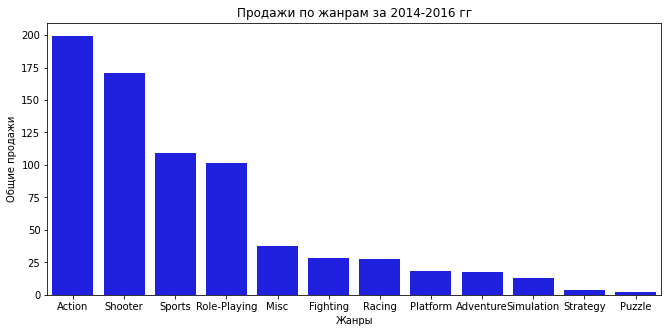

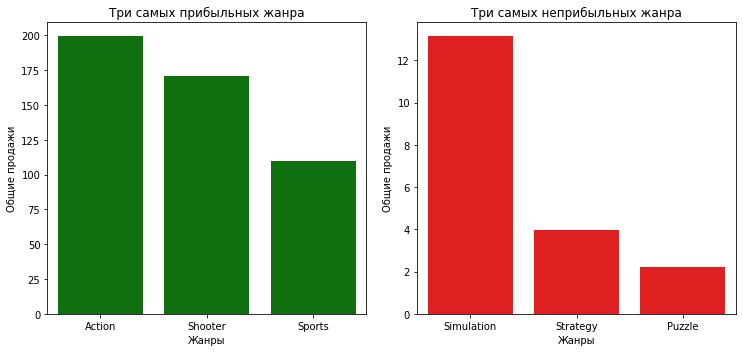

In [49]:
platform_sales_fresh = (
    actual_games
    .pivot_table(index='Genre', values='Total_sales', aggfunc='sum')
    .sort_values('Total_sales', ascending=False)
)

plt.figure(figsize=(11, 5))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'Total_sales', color = 'blue')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

top3_profitable_genres = platform_sales_fresh.head(3)
bottom3_unprofitable_genres = platform_sales_fresh.tail(3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.barplot(data=top3_profitable_genres, x=top3_profitable_genres.index, y='Total_sales', color='green')
plt.title('Три самых прибыльных жанра')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.subplot(1, 3, 3)
sns.barplot(data=bottom3_unprofitable_genres, x=bottom3_unprofitable_genres.index, y='Total_sales', color='red')
plt.title('Три самых неприбыльных жанра')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.tight_layout()
plt.show()

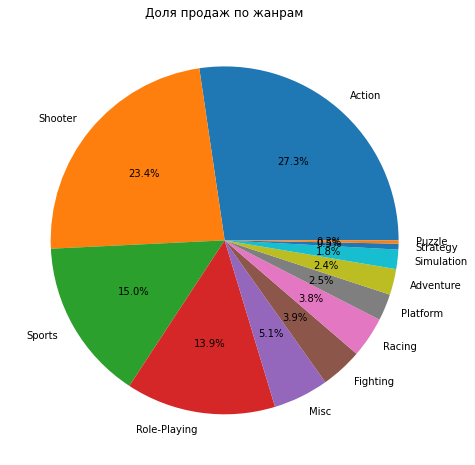

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_fresh['Total_sales'], labels=platform_sales_fresh.index, autopct='%1.1f%%')
plt.title('Доля продаж по жанрам')
plt.show()

По потенциально прибыльным платформам

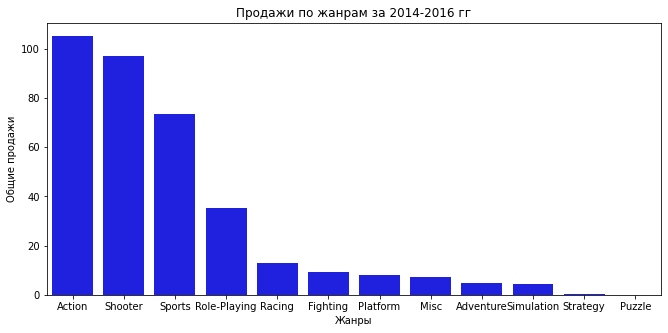

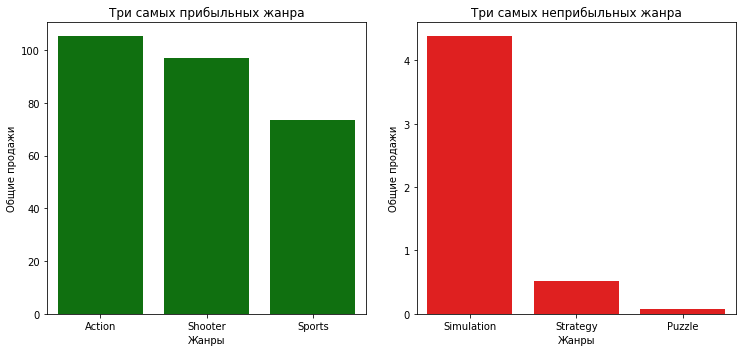

In [51]:
games_on_platform = actual_games.query('Platform in ("XOne", "PS4", "3DS") & Critic_Score != -1 & User_Score != -1')

platform_sales_fresh = (
    games_on_platform
    .pivot_table(index='Genre', values='Total_sales', aggfunc='sum')
    .sort_values('Total_sales', ascending=False)
)

plt.figure(figsize=(11, 5))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'Total_sales', color = 'blue')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

top3_profitable_genres = platform_sales_fresh.head(3)
bottom3_unprofitable_genres = platform_sales_fresh.tail(3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.barplot(data=top3_profitable_genres, x=top3_profitable_genres.index, y='Total_sales', color='green')
plt.title('Три самых прибыльных жанра')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.subplot(1, 3, 3)
sns.barplot(data=bottom3_unprofitable_genres, x=bottom3_unprofitable_genres.index, y='Total_sales', color='red')
plt.title('Три самых неприбыльных жанра')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.tight_layout()
plt.show()

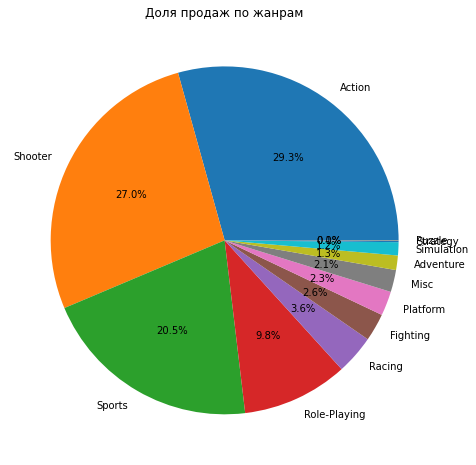

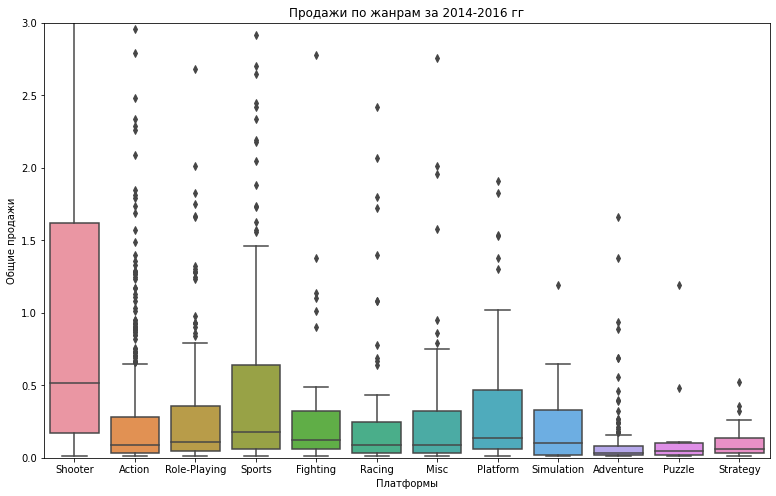

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_fresh['Total_sales'], labels=platform_sales_fresh.index, autopct='%1.1f%%')
plt.title('Доля продаж по жанрам')
plt.show()

plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_games, y = 'Total_sales', x='Genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

**Вывод**: самыми прибыльными являются Экшн и шутеры, где шутеры имеют наилучший график продаж.\
В ТОП 4 можно отметить следующие жанры:
- Шутер
- Экшен
- Спортивные игры
- РПГ

### Шаг 4. Составьте портрет пользователя каждого региона

#### 4.1 Самые популярные платформы (топ-5)

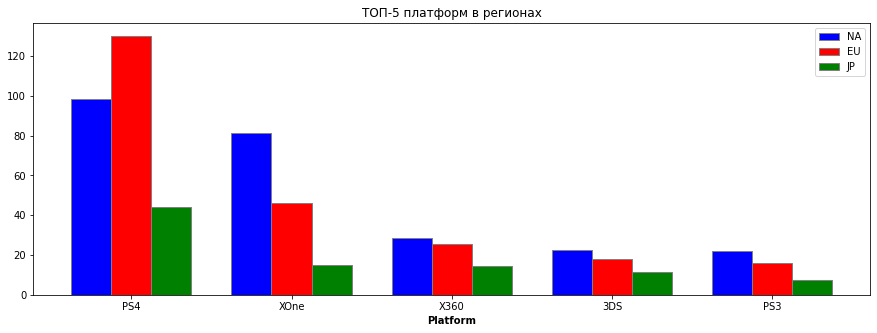

In [53]:
countries = actual_games.columns[4:7]

subtitles = [country.split('_')[0].upper() for country in countries]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('ТОП-5 платформ в регионах')

barWidth = 0.25
bar1 = actual_games.groupby('Platform')[countries[0]].sum().nlargest(5).values
bar2 = actual_games.groupby('Platform')[countries[1]].sum().nlargest(5).values
bar3 = actual_games.groupby('Platform')[countries[2]].sum().nlargest(5).values

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bar1, color='b', width=barWidth, edgecolor='grey', label=subtitles[0])
plt.bar(r2, bar2, color='r', width=barWidth, edgecolor='grey', label=subtitles[1])
plt.bar(r3, bar3, color='g', width=barWidth, edgecolor='grey', label=subtitles[2])

plt.xlabel('Platform', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], actual_games.groupby('Platform')[countries[0]].sum().nlargest(5).index)

plt.legend()
plt.show()

**Вывод**: как мы видим, между регионами существует значительная разница в предпочтениях: Европа предпочитает PS4,\
 Америка выбирает между PS4 и Xbox, а Япония равномерно распределена по всем платформам с приоритетом в PS4.

#### 4.2 Самые популярные жанры (топ-5)

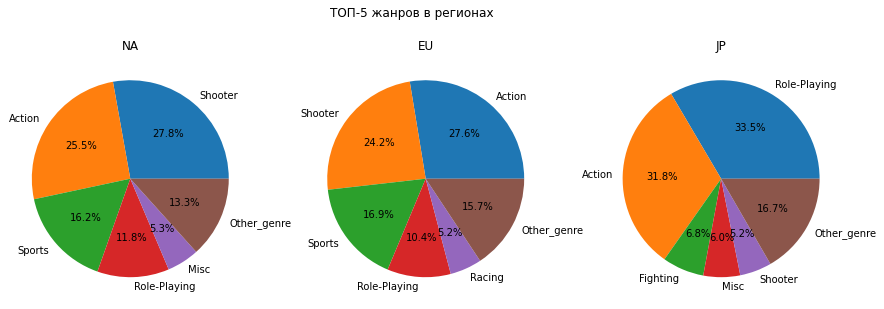

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')

for i in range(3):
    df_i = (actual_games.groupby('Genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending=False, ignore_index=True).
             head(5))
    other_genre_sales = actual_games[countries[i]].sum() - df_i[countries[i]].sum()
    df_i.loc[5] = {'Genre': 'Other_genre', countries[i]: other_genre_sales}

    axs[i].pie(df_i[countries[i]], labels=df_i['Genre'], autopct='%1.1f%%')
    axs[i].set_title(countries[i].split('_')[0].upper())

plt.show()

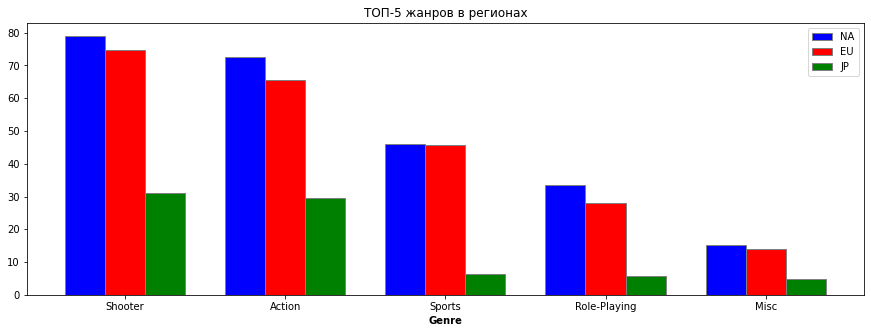

In [55]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('ТОП-5 жанров в регионах')

barWidth = 0.25
bar1 = actual_games.groupby('Genre')[countries[0]].sum().nlargest(5).values
bar2 = actual_games.groupby('Genre')[countries[1]].sum().nlargest(5).values
bar3 = actual_games.groupby('Genre')[countries[2]].sum().nlargest(5).values

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bar1, color='b', width=barWidth, edgecolor='grey', label=subtitles[0])
plt.bar(r2, bar2, color='r', width=barWidth, edgecolor='grey', label=subtitles[1])
plt.bar(r3, bar3, color='g', width=barWidth, edgecolor='grey', label=subtitles[2])

plt.xlabel('Genre', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], actual_games.groupby('Genre')[countries[0]].sum().nlargest(5).index)

plt.legend()
plt.show()

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

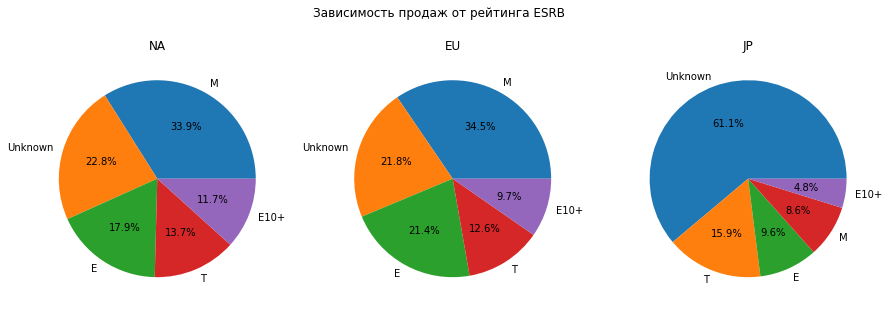

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Зависимость продаж от рейтинга ESRB')

for i in range(3):
    df_i = (actual_games.groupby('Rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending=False, ignore_index=True).
             head(5))
    other_genre_sales = actual_games[countries[i]].sum() - df_i[countries[i]].sum()

    axs[i].pie(df_i[countries[i]], labels=df_i['Rating'], autopct='%1.1f%%')
    axs[i].set_title(countries[i].split('_')[0].upper())

plt.show()

**Вывод**: 
Из ваших наблюдений следует, что рейтинг ESRB кажется имеет не такое сильное влияние на продажи игр, по крайней мере, судя по распределению продаж в разных регионах. Видимо, в Японии предпочтения игроков отличаются (предположительно, 61% "пустых данных..."), возможно, из-за предпочтения кастомных игр или игр от местных производителей, что может быть объяснением отличий в распределении рейтингов ESRB.\
Кроме того, в Европе и Северной Америке категория "M" (для взрослых) кажется занимает значительную долю рынка среди других рейтингов, что может указывать на предпочтения игроков в данных регионах.\
Про американских игроков можно сказать, что они предпочитают играть на PlayStation 4, чаще всего выбирают шутеры и интересуются играми для взрослых, вероятно, с высоким уровнем насилия.\
Европейские игроки также предпочитают PlayStation 4, но скорее выбирают экшены. Также, как американцы, они предпочитают игры для взрослых, возможно, из-за содержания крови или насилия.\
Помимо того, игроки в Японии чаще предпочитают 3DS, играют в ролевые игры и, возможно, отдают предпочтение кастомным играм, возможно, производства внутри страны, что может являться недооцененным аспектом игровой индустрии.

### Шаг 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

alpha = 0.05

In [57]:
score = actual_games[actual_games['User_Score'] != -1]

print('Средний пользовательский рейтинг платформ Xbox One', round(score.query('Platform == "XOne"')['User_Score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(score.query('Platform == "PC"')['User_Score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('Platform == "XOne"')['User_Score'], 
    score.query('Platform == "PC"')['User_Score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ Xbox One 6.59
Средний пользовательский рейтинг платформ PC 6.3

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**: гипотеза опровергнута, причин предполагать схожесть пользовательских рейтингов у PS4 и Xbox у нас нет.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

alpha = 0.05

In [58]:
print('Средний пользовательский рейтинг жанра экшен', round(score.query('Genre == "Action"')['User_Score'].mean(),2))
print('Средний пользовательский рейтинг жанра спортивных игр', round(score.query('Genre == "Sports"')['User_Score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('Genre == "Action"')['User_Score'], 
    score.query('Genre == "Sports"')['User_Score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра экшен 6.76
Средний пользовательский рейтинг жанра спортивных игр 5.23

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**: отвержение нулевой гипотезы гарантирует, что рейтинги жанров Action и Sports разные.

### Шаг 6. Общий вывод.

В процессе выполнение были проведены следующие работы:\
Преобразование данных и обработка пропусков:
- Изменил названия столбцов на нижний регистр для удобства обращения к ним.
- Преобразовал данные в нужные типы: столбцы с датами были преобразованы в тип данных даты для удобства работы с ними, а столбцы с числовыми данными были преобразованы в числовой формат. \
Это помогает обеспечить точность анализа и визуализации данных.
- Обработал пропуски: заполнил пропуски в столбцах, где это было уместно, чтобы не потерять ценные данные. \
Причины пропусков могли быть связаны с отсутствием информации о продажах или оценках в определенные годы или для конкретных игр.\
Анализ трендов:
- Отметил, что с 1980 по 2000 годы наблюдался слабый рост игровой индустрии, но с 2000 года начался активный рост количества выпускаемых игр,\
 достигнув пика в 2008-2009 годах, после чего количество игр снизилось.
- Выделил периоды успешности различных игровых платформ, отметив, что новые платформы обычно быстро набирают популярность в течение 3-4 лет, после чего их продажи снижаются.\
Анализ платформ:
- Обнаружил, что за последние годы лидерами по продажам стали PS4 и XboxOne, что делает их потенциально прибыльными платформами для разработки игр.
- Подчеркнул особенности успешности конкретных платформ и выявил потенциально прибыльные платформы для будущих проектов.\
Корреляция и прибыльные жанры:
- Указал на отсутствие корреляции между пользовательскими оценками и продажами игр для PS4, но силу связи между оценками критиков и продажами игр.
- Описал самые прибыльные жанры игр, отметив шутеры и экшены, которые пользуются большой популярностью среди игроков.\
Региональные предпочтения и культурные особенности:
- Представил портреты игроков из разных регионов, описав основные предпочтения, связанные с игровыми платформами, жанрами игр и оценками ESRB. \
Особое внимание уделил предпочтениям японских игроков, отметив их интерес к ролевым играм и кастомным играм, что может быть следствием культурных особенностей и предпочтений игрового сообщества в Японии.\
Статистические проверки:
- Провел статистическую проверку гипотез о средних пользовательских рейтингах для платформ Xbox One и PC, а также для жанров Action и Sports, сделав выводы о подтверждении или отвержении данных гипотез.

Обобщая работу, можно сказать следующее: слишком много пропусков в категории рейтингов и оценок, что значительно снижает ценность статистико-аналитического анализа. Сам анализ продемонстрировал важность оценок критиков и соответствие рейтинга требованиям аудитории в разрезе продаж игр, а так же увлеченность населения шутерами в противовес экшну, рпг и спортивным играм. Остальные жанры в сумме имеют достаточно малую аудиторию, чтобы не ставить их в приоритет.

В качестве рекомендации могу добавить:
- разработчикам предоставить данные с еньшим количеством выбросов, и соответственно проверить свой код/бд на предмет возможных потерь при выгрузке.
- Игровым кампаниям больше обращать внимание на мнение критиков
- И, разумеется, нам нужно больше шутеров!

### Чек-лист готовности проекта

**Шаг 1. Подготовка данных**

**Надо:**
- [x]  Заменить названия столбцов (привести к нижнему регистру);
- [x]  Преобразовать данные в нужные типы. Описать, в каких столбцах заменил тип данных и почему;
- [x]  Обработать пропуски при необходимости:
- [x]  Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать;
- [x]  Описать причины, которые могли привести к пропускам;
- [x]  Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- [x]  Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 2. Провести исследовательский анализ данных**

**Надо:**
- [x]  Посмотреть, сколько игр выпускалось в разные годы.
- [x]  Посмотреть, как менялись продажи по платформам.
- [x]  Посмотреть какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- [x]  Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- [x]  Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- [x]  Посмотреть на общее распределение игр по жанрам.

**Шаг 3. Составить портрет пользователя каждого региона**

**Надо:**
- [x]  Определить для пользователя каждого региона (NA, EU, JP):
    - [x]  Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - [x]  Самые популярные жанры (топ-5). Поясните разницу.
    - [x]  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 4. Проверить гипотезы**

- [x]  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x]  Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 5. Написать общий вывод**